# Developing coronary artery disease classification system for use in clinical settings
## Data set: Z-Alizadeh sani dataset.xlsx

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import graphviz
import pydotplus
import warnings

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, make_scorer

from sklearn.externals.six import StringIO
from IPython.display import display
from IPython.display import Image

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.cluster import KMeans

%matplotlib inline
warnings.filterwarnings('ignore')

/home/wnarifin/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# <font color=red>Data Preprocessing<font>

In [2]:
ali = pd.read_excel("Z-Alizadeh sani dataset.xlsx")
display(ali.shape)
display(ali.info())
data = ali.copy()  # create a copy to work on, leaving original data intact
display(ali.columns)
display(ali.describe().T)

(303, 56)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
Age                      303 non-null int64
Weight                   303 non-null int64
Length                   303 non-null int64
Sex                      303 non-null object
BMI                      303 non-null float64
DM                       303 non-null int64
HTN                      303 non-null int64
Current Smoker           303 non-null int64
EX-Smoker                303 non-null int64
FH                       303 non-null int64
Obesity                  303 non-null object
CRF                      303 non-null object
CVA                      303 non-null object
Airway disease           303 non-null object
Thyroid Disease          303 non-null object
CHF                      303 non-null object
DLP                      303 non-null object
BP                       303 non-null int64
PR                       303 non-null int64
Edema                    303 non-null int64
Weak 

None

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'BBB', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN',
       'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE',
       'Region RWMA', 'VHD', 'Cath'],
      dtype='object')

,count,mean,std,min,25%,50%,75%,max
Age,303.0,58.897690,10.392278,30.000000,51.00000,58.00000,66.000000,86.000000
Weight,303.0,73.831683,11.987358,48.000000,65.00000,74.00000,81.000000,120.000000
Length,303.0,164.716172,9.327661,140.000000,158.00000,165.00000,171.000000,188.000000
BMI,303.0,27.248339,4.098865,18.115413,24.51438,26.77551,29.411765,40.900658
DM,303.0,0.297030,0.457706,0.000000,0.00000,0.00000,1.000000,1.000000
HTN,303.0,0.590759,0.492507,0.000000,0.00000,1.00000,1.000000,1.000000
Current Smoker,303.0,0.207921,0.406491,0.000000,0.00000,0.00000,0.000000,1.000000
EX-Smoker,303.0,0.033003,0.178941,0.000000,0.00000,0.00000,0.000000,1.000000
FH,303.0,0.158416,0.365734,0.000000,0.00000,0.00000,0.000000,1.000000
BP,303.0,129.554455,18.938105,90.000000,120.00000,130.00000,140.000000,190.000000


In [3]:
ali_cat = list(ali.dtypes == "object")  # all object variables (categorical)
ali.iloc[:,ali_cat].columns
for c in ali.iloc[:,ali_cat].columns:  # counts and % for categorical variables
  display("--- %s (n, percent) ---" %c)
  display(ali[c].value_counts(), "\n")
  display((ali[c].value_counts() / len(ali) * 100).round(1), "\n")
display(ali.head())

'--- Sex (n, percent) ---'

Male     176
Fmale    127
Name: Sex, dtype: int64

'\n'

Male     58.1
Fmale    41.9
Name: Sex, dtype: float64

'\n'

'--- Obesity (n, percent) ---'

Y    211
N     92
Name: Obesity, dtype: int64

'\n'

Y    69.6
N    30.4
Name: Obesity, dtype: float64

'\n'

'--- CRF (n, percent) ---'

N    297
Y      6
Name: CRF, dtype: int64

'\n'

N    98.0
Y     2.0
Name: CRF, dtype: float64

'\n'

'--- CVA (n, percent) ---'

N    298
Y      5
Name: CVA, dtype: int64

'\n'

N    98.3
Y     1.7
Name: CVA, dtype: float64

'\n'

'--- Airway disease (n, percent) ---'

N    292
Y     11
Name: Airway disease, dtype: int64

'\n'

N    96.4
Y     3.6
Name: Airway disease, dtype: float64

'\n'

'--- Thyroid Disease (n, percent) ---'

N    296
Y      7
Name: Thyroid Disease, dtype: int64

'\n'

N    97.7
Y     2.3
Name: Thyroid Disease, dtype: float64

'\n'

'--- CHF (n, percent) ---'

N    302
Y      1
Name: CHF, dtype: int64

'\n'

N    99.7
Y     0.3
Name: CHF, dtype: float64

'\n'

'--- DLP (n, percent) ---'

N    191
Y    112
Name: DLP, dtype: int64

'\n'

N    63.0
Y    37.0
Name: DLP, dtype: float64

'\n'

'--- Weak Peripheral Pulse (n, percent) ---'

N    298
Y      5
Name: Weak Peripheral Pulse, dtype: int64

'\n'

N    98.3
Y     1.7
Name: Weak Peripheral Pulse, dtype: float64

'\n'

'--- Lung rales (n, percent) ---'

N    292
Y     11
Name: Lung rales, dtype: int64

'\n'

N    96.4
Y     3.6
Name: Lung rales, dtype: float64

'\n'

'--- Systolic Murmur (n, percent) ---'

N    262
Y     41
Name: Systolic Murmur, dtype: int64

'\n'

N    86.5
Y    13.5
Name: Systolic Murmur, dtype: float64

'\n'

'--- Diastolic Murmur (n, percent) ---'

N    294
Y      9
Name: Diastolic Murmur, dtype: int64

'\n'

N    97.0
Y     3.0
Name: Diastolic Murmur, dtype: float64

'\n'

'--- Dyspnea (n, percent) ---'

N    169
Y    134
Name: Dyspnea, dtype: int64

'\n'

N    55.8
Y    44.2
Name: Dyspnea, dtype: float64

'\n'

'--- Atypical (n, percent) ---'

N    210
Y     93
Name: Atypical, dtype: int64

'\n'

N    69.3
Y    30.7
Name: Atypical, dtype: float64

'\n'

'--- Nonanginal (n, percent) ---'

N    287
Y     16
Name: Nonanginal, dtype: int64

'\n'

N    94.7
Y     5.3
Name: Nonanginal, dtype: float64

'\n'

'--- Exertional CP (n, percent) ---'

N    303
Name: Exertional CP, dtype: int64

'\n'

N    100.0
Name: Exertional CP, dtype: float64

'\n'

'--- LowTH Ang (n, percent) ---'

N    301
Y      2
Name: LowTH Ang, dtype: int64

'\n'

N    99.3
Y     0.7
Name: LowTH Ang, dtype: float64

'\n'

'--- LVH (n, percent) ---'

N    283
Y     20
Name: LVH, dtype: int64

'\n'

N    93.4
Y     6.6
Name: LVH, dtype: float64

'\n'

'--- Poor R Progression (n, percent) ---'

N    294
Y      9
Name: Poor R Progression, dtype: int64

'\n'

N    97.0
Y     3.0
Name: Poor R Progression, dtype: float64

'\n'

'--- BBB (n, percent) ---'

N       282
LBBB     13
RBBB      8
Name: BBB, dtype: int64

'\n'

N       93.1
LBBB     4.3
RBBB     2.6
Name: BBB, dtype: float64

'\n'

'--- VHD (n, percent) ---'

mild        149
N           116
Moderate     27
Severe       11
Name: VHD, dtype: int64

'\n'

mild        49.2
N           38.3
Moderate     8.9
Severe       3.6
Name: VHD, dtype: float64

'\n'

'--- Cath (n, percent) ---'

Cad       216
Normal     87
Name: Cath, dtype: int64

'\n'

Cad       71.3
Normal    28.7
Name: Cath, dtype: float64

'\n'

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [4]:
# Recoding
# ===
# standardize all categorical variables with numerical coding
ali.iloc[:,ali_cat].columns  # list all character / improperly coded categorical variables
for c in ali.iloc[:,ali_cat].columns:  # list the values for each variables
  display("--- %s ---" %c)
  display(ali[c].unique(), "\n")
# notice Exertional CP is constant, only N value. Can be dropped.

'--- Sex ---'

array(['Male', 'Fmale'], dtype=object)

'\n'

'--- Obesity ---'

array(['Y', 'N'], dtype=object)

'\n'

'--- CRF ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- CVA ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Airway disease ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Thyroid Disease ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- CHF ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- DLP ---'

array(['Y', 'N'], dtype=object)

'\n'

'--- Weak Peripheral Pulse ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Lung rales ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Systolic Murmur ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Diastolic Murmur ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Dyspnea ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Atypical ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Nonanginal ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Exertional CP ---'

array(['N'], dtype=object)

'\n'

'--- LowTH Ang ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- LVH ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Poor R Progression ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- BBB ---'

array(['N', 'LBBB', 'RBBB'], dtype=object)

'\n'

'--- VHD ---'

array(['N', 'mild', 'Severe', 'Moderate'], dtype=object)

'\n'

'--- Cath ---'

array(['Cad', 'Normal'], dtype=object)

'\n'

In [5]:
# Commit all changes to "data"
# Recode Y/N first in one go. Easier.
non_yn = ["Sex","BBB","VHD","Cath"]
ali.iloc[:,ali_cat].columns.difference(non_yn)  # exclude non Y/N
for c in ali.iloc[:,ali_cat].columns.difference(non_yn):  # confirm only Y/N
  display("--- %s ---" %c)
  display(ali[c].unique(), "\n")

'--- Airway disease ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Atypical ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- CHF ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- CRF ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- CVA ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- DLP ---'

array(['Y', 'N'], dtype=object)

'\n'

'--- Diastolic Murmur ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Dyspnea ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Exertional CP ---'

array(['N'], dtype=object)

'\n'

'--- LVH ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- LowTH Ang ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Lung rales ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Nonanginal ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Obesity ---'

array(['Y', 'N'], dtype=object)

'\n'

'--- Poor R Progression ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Systolic Murmur ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Thyroid Disease ---'

array(['N', 'Y'], dtype=object)

'\n'

'--- Weak Peripheral Pulse ---'

array(['N', 'Y'], dtype=object)

'\n'

In [6]:
# commit to 'data'
data[ali.iloc[:,ali_cat].columns.difference(non_yn)] = ali[ali.iloc[:,ali_cat].columns.difference(non_yn)].replace({"Y":1, "N":0})
for c in ali.iloc[:,ali_cat].columns.difference(non_yn):  # confirm correct coding
  print(pd.crosstab(np.array(data[c]), ali[c]))
  print("\n")

Airway disease    N   Y
row_0                  
0               292   0
1                 0  11


Atypical    N   Y
row_0            
0         210   0
1           0  93


CHF      N  Y
row_0        
0      302  0
1        0  1


CRF      N  Y
row_0        
0      297  0
1        0  6


CVA      N  Y
row_0        
0      298  0
1        0  5


DLP      N    Y
row_0          
0      191    0
1        0  112


Diastolic Murmur    N  Y
row_0                   
0                 294  0
1                   0  9


Dyspnea    N    Y
row_0            
0        169    0
1          0  134


Exertional CP    N
row_0             
0              303


LVH      N   Y
row_0         
0      283   0
1        0  20


LowTH Ang    N  Y
row_0            
0          301  0
1            0  2


Lung rales    N   Y
row_0              
0           292   0
1             0  11


Nonanginal    N   Y
row_0              
0           287   0
1             0  16


Obesity   N    Y
row_0           
0        92    0
1 

In [7]:
# Sex. Rename to Male variable, Male=1, Female=0
ali.Sex.unique()
data = data.rename(columns={"Sex":"Male"})
data.columns
data.Male = data.Male.replace({"Male":1, "Fmale":0})
pd.crosstab(data.Male, ali.Sex)  # correctly coded

Sex,Fmale,Male
Male,,
0,127,0
1,0,176


In [8]:
# BBB, left/right Bundle Branch Block
# Recode into two dummy variables: LBBB = 1/0, RBBB = 1/0
ali.BBB.unique()
data["LBBB"] = 0
data["RBBB"] = 0
data.LBBB[ali.BBB == "LBBB"] = 1
data.RBBB[ali.BBB == "RBBB"] = 1
pd.DataFrame({"BBB":ali.BBB, "LBBB":data.LBBB, "RBBB":data.RBBB})[(ali.BBB == "LBBB") | (ali.BBB == "RBBB")]  # correctly coded
pd.crosstab(data.LBBB, ali.BBB)
pd.crosstab(data.RBBB, ali.BBB)

BBB,LBBB,N,RBBB
RBBB,,,
0,13,282,0
1,0,0,8


In [9]:
# VHD, valvular heart disease
# Recode into ordinal order: 0, 1, 2, 3
ali.VHD.unique()
data.VHD = data.VHD.replace({"N":0, "mild":1, "Moderate":2, "Severe":3})
pd.crosstab(data.VHD, ali.VHD)  # correctly coded

VHD,Moderate,N,Severe,mild
VHD,,,,
Moderate,27,0,0,0
N,0,116,0,0
Severe,0,0,11,0
mild,0,0,0,149


In [10]:
# Lastly, the outcome Cath
ali.Cath.unique()
# better rename to CAD, more descriptive
# to move it to the end, create Cad variable, and delete Cath
data["Cad"] = data.Cath
data = data.drop("Cath", axis=1)
data.Cad = data.Cad.replace({"Cad":1, "Normal":0})
pd.crosstab(data.Cad, ali.Cath)  # correctly coded

Cath,Cad,Normal
Cad,,
0,0,87
1,216,0


In [11]:
# Remove variables
# ===
# We want to remove redundant variables
# Candidates:
# BBB, already recoded to LBBB and RBBB
# Exertional CP only contains No, drop.
# Weight, Length (Height), BMI and Obesity are derived from each other. Keep only one.
# ...
# Drop BBB & Exertional CP
data = data.drop(["BBB","Exertional CP"], axis=1)
data.columns
# For Weight, Length (Height), BMI and Obesity, check correlation first
data[["Weight","Length","BMI","Obesity"]].corr()
(data.Weight / ((data.Length/100)**2) - data.BMI).describe()  # correct, Length is indeed Height in cm
data = data.drop(["Weight", "Length"], axis=1)
# keep Obesity/BMI at this moment. Because sometime cetegorical variable is better in a model.
# keep in view NOT to analyze BMI and Obesity together!

In [12]:
# Cleaned data
# ===
data.columns
num_range = list(range(34,49))  # to unpack range list in data_num below
data_num = data.iloc[:, [0,2,15,16,*num_range]].columns  # numerical variables
data_cat = data.columns.difference(data[data_num].columns)  # categorical variables
# final check to make sure for categorical variable, at least 2 categories
data[data_cat].apply(pd.Index.value_counts).T  # In count
data[data_cat].apply(lambda x: pd.Index.value_counts(x) / len(data) * 100).T.round(1)  # In percentage
data[data_num].describe().T.round(2)  # Numerical only

,count,mean,std,min,25%,50%,75%,max
Age,303.0,58.90,10.39,30.00,51.00,58.00,66.00,86.0
BMI,303.0,27.25,4.10,18.12,24.51,26.78,29.41,40.9
BP,303.0,129.55,18.94,90.00,120.00,130.00,140.00,190.0
PR,303.0,75.14,8.91,50.00,70.00,70.00,80.00,110.0
FBS,303.0,119.18,52.08,62.00,88.50,98.00,130.00,400.0
CR,303.0,1.06,0.26,0.50,0.90,1.00,1.20,2.2
TG,303.0,150.34,97.96,37.00,90.00,122.00,177.00,1050.0
LDL,303.0,104.64,35.40,18.00,80.00,100.00,122.00,232.0
HDL,303.0,40.23,10.56,15.90,33.50,39.00,45.50,111.0
BUN,303.0,17.50,6.96,6.00,13.00,16.00,20.00,52.0


<Figure size 432x288 with 0 Axes>

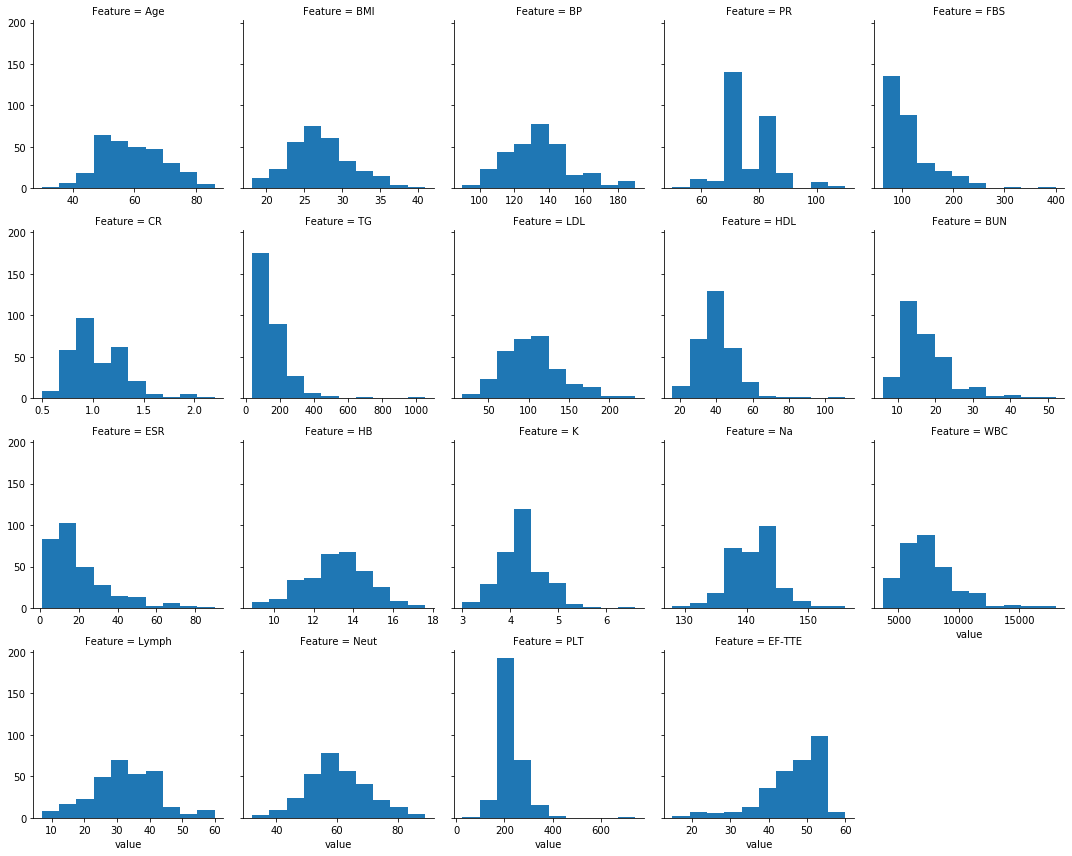

In [13]:
# Normality of numerical variables
# plt.figure(); sns.pairplot(data[data_num]);plt.show()  # takes time to generate
# Multiple histogram all
plt.figure()
data_long = pd.melt(data[data_num], var_name="Feature")
g = sns.FacetGrid(data_long, col="Feature", col_wrap=5, sharex=False)
g.map(plt.hist, "value")
plt.show()

<Figure size 432x288 with 0 Axes>

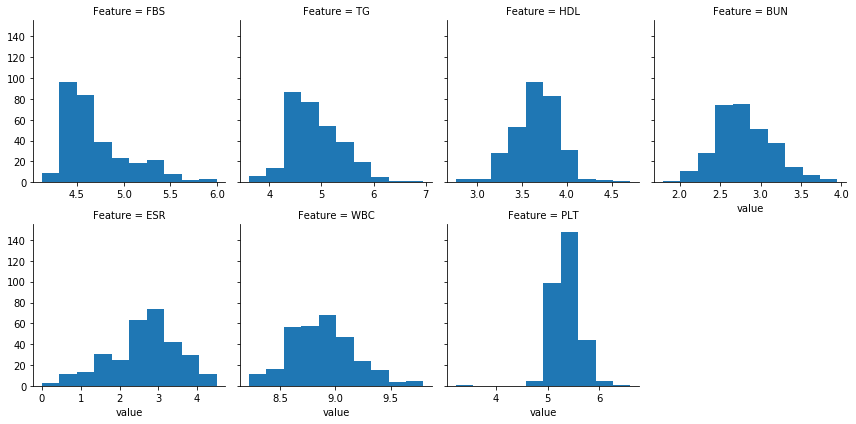

In [14]:
# Multiple histogram of log "FBS", "TG", "HDL", "BUN", "ESR", "WBC", "PLT"
plt.figure()
data1 = np.log(data[["FBS", "TG", "HDL", "BUN", "ESR", "WBC", "PLT"]])
data1_long = pd.melt(data1, var_name="Feature")
g = sns.FacetGrid(data1_long, col="Feature", col_wrap=4, sharex=False)
g.map(plt.hist, "value")
plt.show()  # less skewed

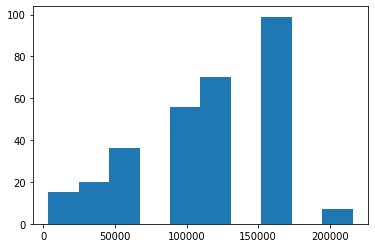

In [15]:
# Histogram of cubed "EF-TTE"
plt.figure()
plt.hist(data["EF-TTE"]**3)
plt.show()  # less skewed

In [16]:
# Replace to transformed values and rename
data[["FBS", "TG", "HDL", "BUN", "ESR", "WBC", "PLT"]] = np.log(data[["FBS", "TG", "HDL", "BUN", "ESR", "WBC", "PLT"]])
data["EF-TTE"] = data["EF-TTE"]**3
data = data.rename(columns={"FBS":"FBS_log", "TG":"TG_log", "HDL":"HDL_log", "BUN":"BUN_log", "ESR":"ESR_log", "WBC":"WBC_log", "PLT":"PLT_log", "EF-TTE":"EF_TTE_pow3"})
data.columns

Index(['Age', 'Male', 'BMI', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH',
       'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF',
       'DLP', 'BP', 'PR', 'Edema', 'Weak Peripheral Pulse', 'Lung rales',
       'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea',
       'Function Class', 'Atypical', 'Nonanginal', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'FBS_log', 'CR', 'TG_log', 'LDL', 'HDL_log',
       'BUN_log', 'ESR_log', 'HB', 'K', 'Na', 'WBC_log', 'Lymph', 'Neut',
       'PLT_log', 'EF_TTE_pow3', 'Region RWMA', 'VHD', 'LBBB', 'RBBB', 'Cad'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

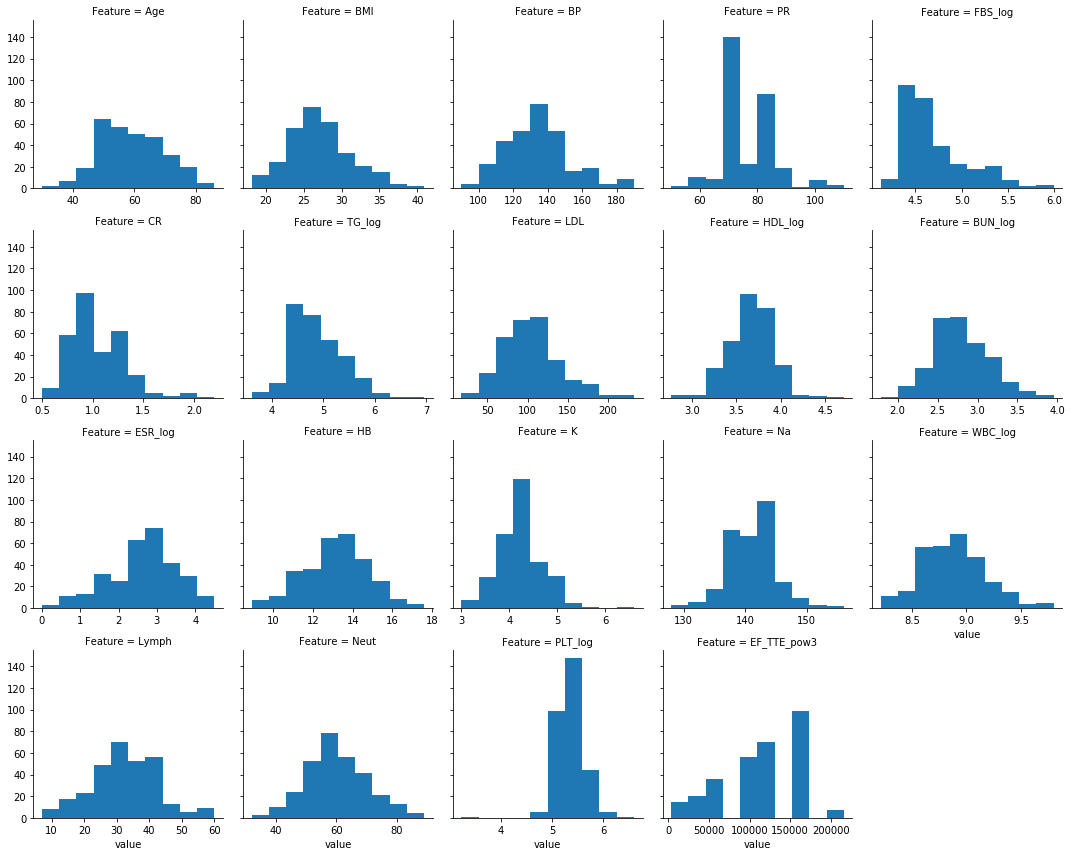

In [17]:
# Multiple histogram all post transformation
plt.figure()
data_num = data.iloc[:, [0,2,15,16,*num_range]].columns  # renew data_num column names
data_long = pd.melt(data[data_num], var_name="Feature")
g = sns.FacetGrid(data_long, col="Feature", col_wrap=5, sharex=False)
g.map(plt.hist, "value")
plt.show()

In [18]:
# Save cleaned data set
# ===
data.to_csv("ali_clean_transform.csv", index=False)
# verify can be easily loaded
ali = pd.read_csv("ali_clean_transform.csv")
ali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 54 columns):
Age                      303 non-null int64
Male                     303 non-null int64
BMI                      303 non-null float64
DM                       303 non-null int64
HTN                      303 non-null int64
Current Smoker           303 non-null int64
EX-Smoker                303 non-null int64
FH                       303 non-null int64
Obesity                  303 non-null int64
CRF                      303 non-null int64
CVA                      303 non-null int64
Airway disease           303 non-null int64
Thyroid Disease          303 non-null int64
CHF                      303 non-null int64
DLP                      303 non-null int64
BP                       303 non-null int64
PR                       303 non-null int64
Edema                    303 non-null int64
Weak Peripheral Pulse    303 non-null int64
Lung rales               303 non-null int64
Systolic Murm

# <font color=red>Data Exploration & Feature Selection<font>

In [19]:
# read cleaned and transformed data
ali = pd.read_csv("ali_clean_transform.csv")
display(ali.info())
display(ali.shape)
# set X, y
X = ali.iloc[:,:-1]
y = ali.iloc[:,-1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 54 columns):
Age                      303 non-null int64
Male                     303 non-null int64
BMI                      303 non-null float64
DM                       303 non-null int64
HTN                      303 non-null int64
Current Smoker           303 non-null int64
EX-Smoker                303 non-null int64
FH                       303 non-null int64
Obesity                  303 non-null int64
CRF                      303 non-null int64
CVA                      303 non-null int64
Airway disease           303 non-null int64
Thyroid Disease          303 non-null int64
CHF                      303 non-null int64
DLP                      303 non-null int64
BP                       303 non-null int64
PR                       303 non-null int64
Edema                    303 non-null int64
Weak Peripheral Pulse    303 non-null int64
Lung rales               303 non-null int64
Systolic Murm

None

(303, 54)

In [20]:
## feature selection
kBest = SelectKBest(f_classif, k=53)  # all features
# use f stats because it involves numerical variables
kBest.fit(X, y)
sup = kBest.get_support(True)
result_kbest = pd.DataFrame({"Features":np.array(X.iloc[:,sup].columns),"Stats":kBest.scores_[sup],"P-value":kBest.pvalues_[sup]})
result_kbest[result_kbest["P-value"] < 0.25].sort_values(by="P-value").round(3)
f_test = sup[kBest.pvalues_[sup] < 0.25]  # selected variables
print("Selected variable count:", len(f_test), "\n")
print(X.iloc[:,f_test].columns)

Selected variable count: 35 

Index(['Age', 'Male', 'BMI', 'DM', 'HTN', 'Current Smoker', 'CRF',
       'Airway disease', 'BP', 'PR', 'Weak Peripheral Pulse',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Q Wave', 'St Elevation', 'St Depression',
       'Tinversion', 'Poor R Progression', 'FBS_log', 'CR', 'TG_log',
       'BUN_log', 'ESR_log', 'K', 'Na', 'Lymph', 'Neut', 'PLT_log',
       'EF_TTE_pow3', 'Region RWMA', 'LBBB'],
      dtype='object')


In [21]:
# selected features from univariate feature selection, F-test p-values < 0.25.
sel = ['Age', 'Male', 'BMI', 'DM', 'HTN', 'Current Smoker', 'CRF',
       'Airway disease', 'BP', 'PR', 'Weak Peripheral Pulse',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Q Wave', 'St Elevation', 'St Depression',
       'Tinversion', 'Poor R Progression', 'FBS_log', 'CR', 'TG_log',
       'BUN_log', 'ESR_log', 'K', 'Na', 'Lymph', 'Neut', 'PLT_log',
       'EF_TTE_pow3', 'Region RWMA', 'LBBB']

In [22]:
cor_sel = ['Age', 'Male', 'BMI', 'DM', 'HTN', 'Current Smoker', 'CRF',
       'Airway disease', 'BP', 'PR', 'Weak Peripheral Pulse',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Q Wave', 'St Elevation', 'St Depression',
       'Tinversion', 'Poor R Progression', 'FBS_log', 'CR', 'TG_log',
       'BUN_log', 'ESR_log', 'K', 'Na', 'Lymph', 'Neut', 'PLT_log',
       'EF_TTE_pow3', 'Region RWMA', 'LBBB', 'Cad']

X_cor_sel = ali[cor_sel]
pd.set_option('display.max_columns', 999)
X_cor_sel.describe(include='all').T.round(2) 

,count,mean,std,min,25%,50%,75%,max
Age,303.0,58.90,10.39,30.00,51.00,58.00,66.00,86.00
Male,303.0,0.58,0.49,0.00,0.00,1.00,1.00,1.00
BMI,303.0,27.25,4.10,18.12,24.51,26.78,29.41,40.90
DM,303.0,0.30,0.46,0.00,0.00,0.00,1.00,1.00
HTN,303.0,0.59,0.49,0.00,0.00,1.00,1.00,1.00
Current Smoker,303.0,0.21,0.41,0.00,0.00,0.00,0.00,1.00
CRF,303.0,0.02,0.14,0.00,0.00,0.00,0.00,1.00
Airway disease,303.0,0.04,0.19,0.00,0.00,0.00,0.00,1.00
BP,303.0,129.55,18.94,90.00,120.00,130.00,140.00,190.00
PR,303.0,75.14,8.91,50.00,70.00,70.00,80.00,110.00


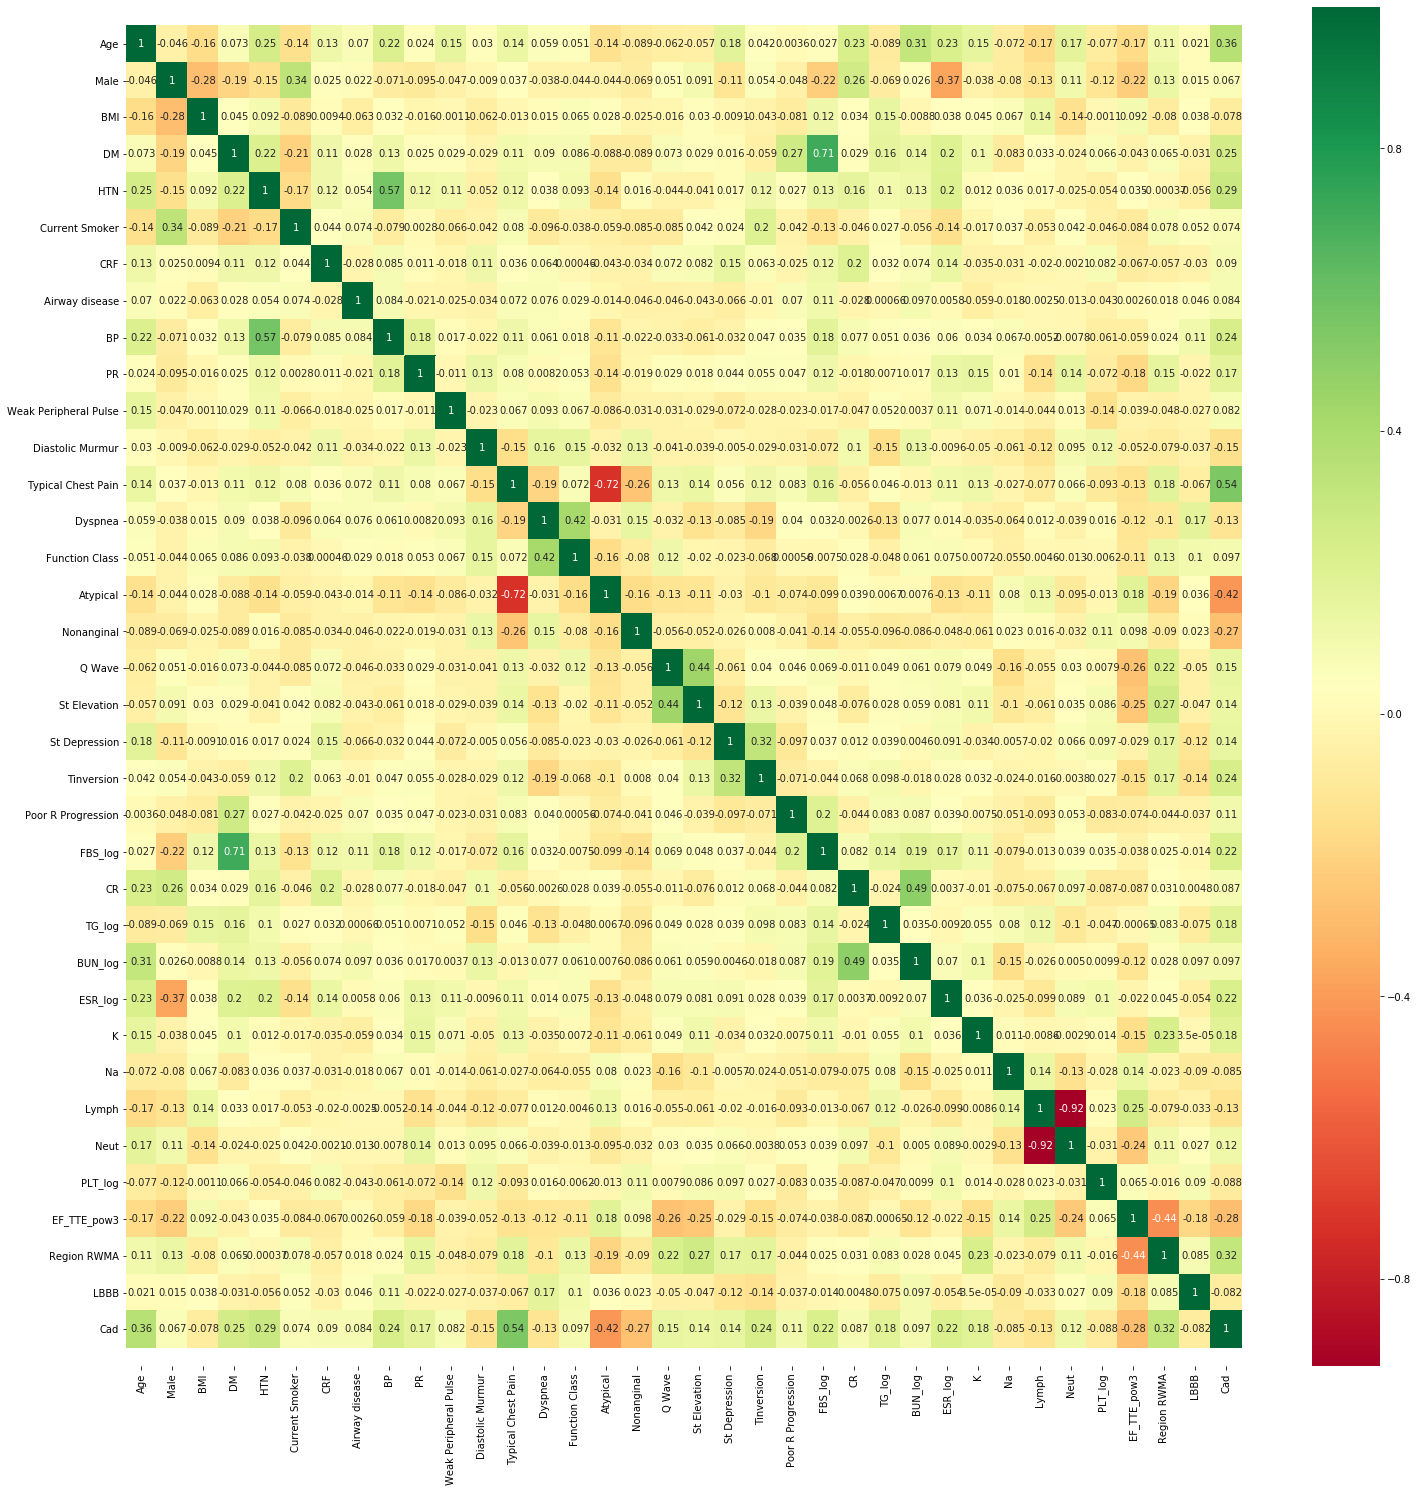

In [23]:
corrmat = X_cor_sel.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(X_cor_sel[top_corr_features].corr(),annot=True,cmap="RdYlGn")
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig("figure.png") # save as png

# <font color=red>Classification: Naive Bayes | Decision Tree | SVM<font>

In [24]:
alizadeh = pd.read_csv("ali_clean_transform.csv")

In [25]:
x = alizadeh[['Age', 'Male', 'BMI', 'DM', 'HTN', 'Current Smoker', 'CRF','Airway disease', 'BP', 'PR', 'Weak Peripheral Pulse',
              'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class','Atypical', 'Nonanginal', 'Q Wave', 
              'St Elevation', 'St Depression', 'Tinversion', 'Poor R Progression', 'FBS_log', 'CR', 'TG_log','BUN_log', 
              'ESR_log', 'K', 'Na', 'Lymph', 'Neut', 'PLT_log','EF_TTE_pow3', 'Region RWMA', 'LBBB']]
y = alizadeh.iloc[:,-1]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

# <font color=blue>Naive Bayes<font>

In [27]:
gnb = GaussianNB().fit(x_train,y_train)
gnb_pred = gnb.predict(x_test)

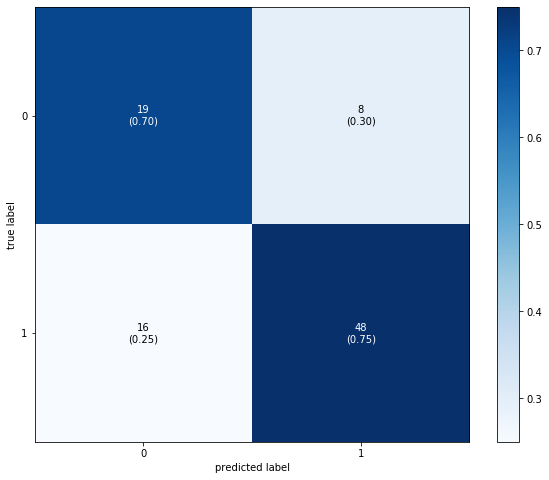

In [28]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm_gnb = confusion_matrix(y_target=y_test, 
                            y_predicted=gnb_pred, 
                            binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm_gnb,figsize=(10,8),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap=plt.cm.Blues)

plt.savefig('NB-Base-CM.jpg')
plt.show()

In [29]:
print("Misclassified samples: %d out of %d\n".center(67) % ((y_test != gnb_pred).sum(), y_test.shape[0]))
print(classification_report(y_test, gnb_pred))

                Misclassified samples: 24 out of 91
               
              precision    recall  f1-score   support

           0       0.54      0.70      0.61        27
           1       0.86      0.75      0.80        64

    accuracy                           0.74        91
   macro avg       0.70      0.73      0.71        91
weighted avg       0.76      0.74      0.74        91



##### 5 K-fold Cross Validation

In [30]:
gnb = GaussianNB()
y_pred = cross_val_predict(gnb, x, y, cv=5)

print("Misclassified samples: %d out of %d\n".center(67) % ((y != y_pred).sum(), y_pred.shape[0]))
print(classification_report(y, y_pred))

                Misclassified samples: 77 out of 303
               
              precision    recall  f1-score   support

           0       0.55      0.67      0.60        87
           1       0.85      0.78      0.81       216

    accuracy                           0.75       303
   macro avg       0.70      0.72      0.71       303
weighted avg       0.77      0.75      0.75       303



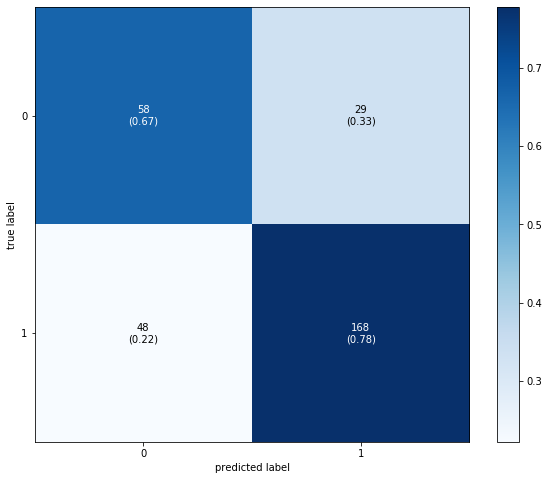

In [31]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm_gnb = confusion_matrix(y_target=y, 
                          y_predicted=y_pred, 
                          binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm_gnb,figsize=(10,8),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap=plt.cm.Blues)

plt.savefig('NB-5KFCV-CM.jpg')
plt.show()

# <font color=blue>Decision Tree<font>

In [32]:
dtree = DecisionTreeClassifier().fit(x_train, y_train)
dt_predict = dtree.predict(x_test)

Decision Tree Classifier Max Depth: 8


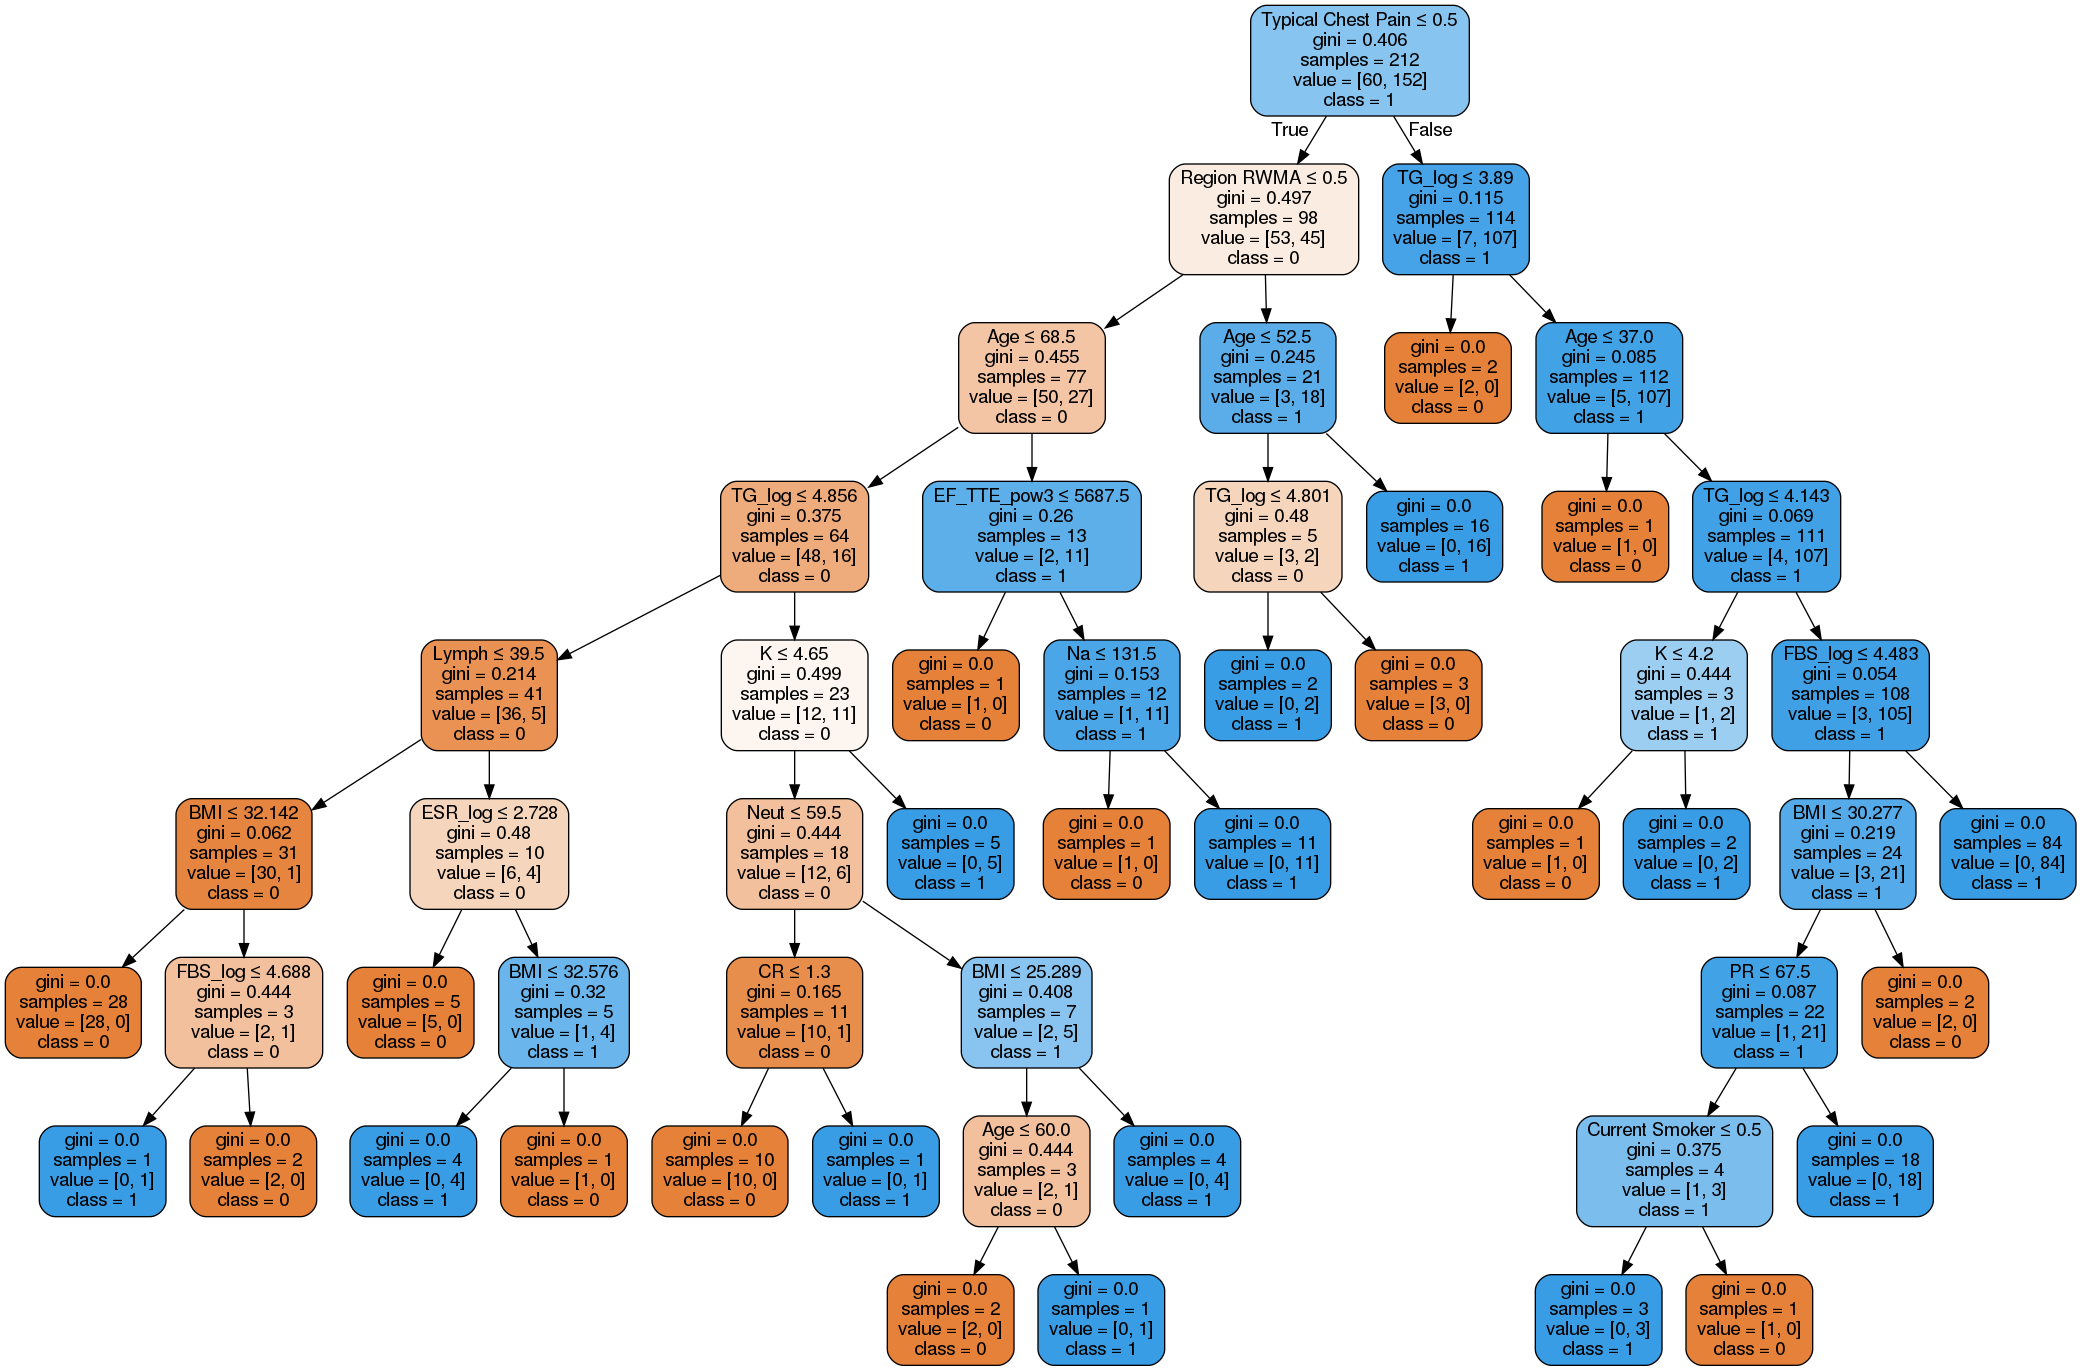

In [33]:
print('Decision Tree Classifier Max Depth: {}'.format(dtree.tree_.max_depth))
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ali_dtree1.png')
Image(graph.create_png())

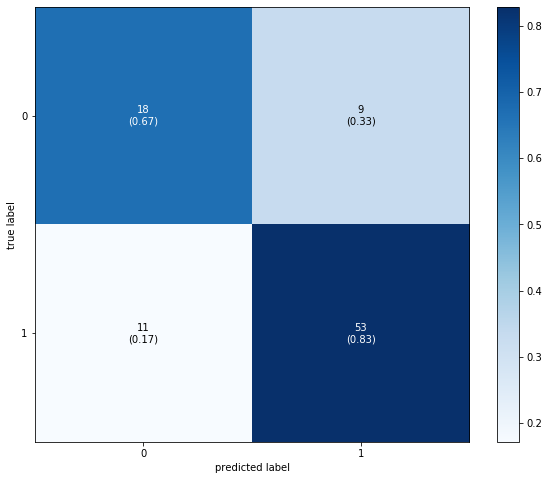

In [34]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm_dtree = confusion_matrix(y_target=y_test, 
                            y_predicted=dt_predict, 
                            binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm_dtree,figsize=(10,8),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap=plt.cm.Blues)

plt.savefig('DT-Base-CM.jpg')
plt.show()

In [35]:
print("Misclassified samples: %d out of %d\n".center(67) % ((y_test != dt_predict).sum(), dt_predict.shape[0]))
print(classification_report(y_test, gnb_pred))

                Misclassified samples: 20 out of 91
               
              precision    recall  f1-score   support

           0       0.54      0.70      0.61        27
           1       0.86      0.75      0.80        64

    accuracy                           0.74        91
   macro avg       0.70      0.73      0.71        91
weighted avg       0.76      0.74      0.74        91



##### Decision Tree - GridSearchCV for Hyperparmeters Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

dtf = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': range(3, 21),
              'min_samples_split': range(2,6),
              'min_samples_leaf': range(1,11),
              'splitter' : ['best', 'random']
             } 

dtgrid = GridSearchCV(estimator = dtf,
                      param_grid = param_grid, 
                      cv = 5, 
                      scoring='accuracy', 
                      refit = True)   #setting grid with estimator


dtgrid.fit(x, y)
print("\nBest Decision Tree parameters for this data set: ")
print(dtgrid.best_params_)


Best Decision Tree parameters for this data set: 
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 6, 'min_samples_split': 3, 'splitter': 'random'}


###### Decision Tree - 5 K-fold Cross Validation using Optimal Hyperparameters

In [37]:
dtop = DecisionTreeClassifier(criterion = 'entropy', 
                              max_depth = 15, 
                              min_samples_leaf = 8,
                              min_samples_split = 5,
                              splitter = 'random',
                              random_state = 123
                             ).fit(x, y)

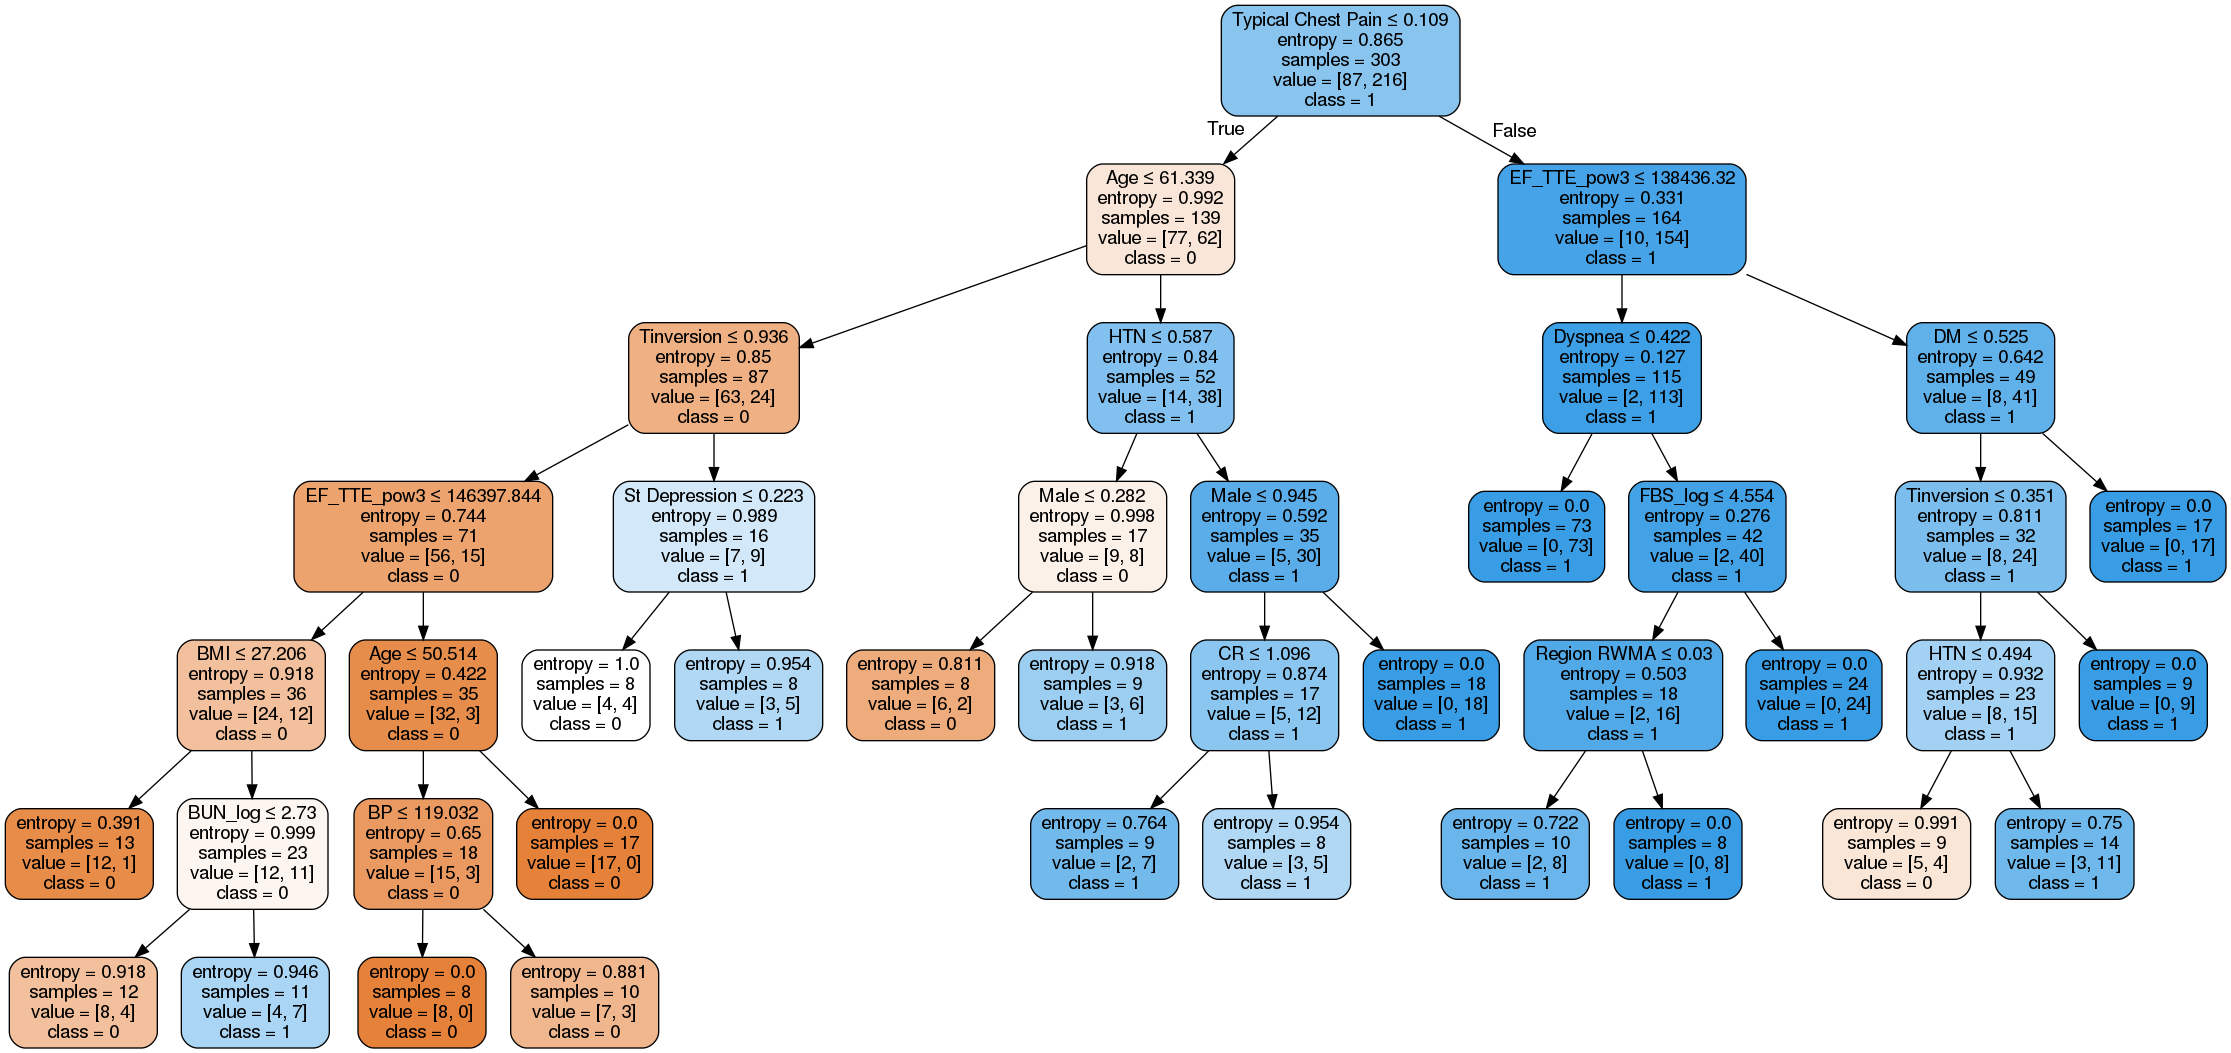

In [38]:
dot_data = StringIO()
export_graphviz(dtop, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = x.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ali_dtree2.png')
Image(graph.create_png())

In [39]:
dtop_y_pred = cross_val_predict(dtop, x, y, cv=5)

print("Misclassified samples: %d out of %d\n".center(67) % ((y != dtop_y_pred).sum(), dtop_y_pred.shape[0]))
print(classification_report(y, dtop_y_pred))

                Misclassified samples: 56 out of 303
               
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        87
           1       0.87      0.87      0.87       216

    accuracy                           0.82       303
   macro avg       0.77      0.77      0.77       303
weighted avg       0.82      0.82      0.82       303



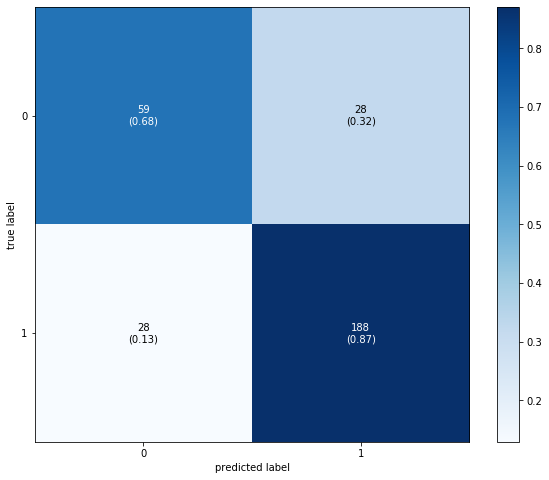

In [40]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm_dt_cv = confusion_matrix(y_target=y, 
                            y_predicted=dtop_y_pred, 
                            binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm_dt_cv,figsize=(10,8),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap=plt.cm.Blues)

plt.savefig('DT-5KFCV-CM.jpg')
plt.show()

# <font color=blue>SVM<font>

In [41]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
svm = SVC().fit(x_train, y_train)
svm_predict = svm.predict(x_test)

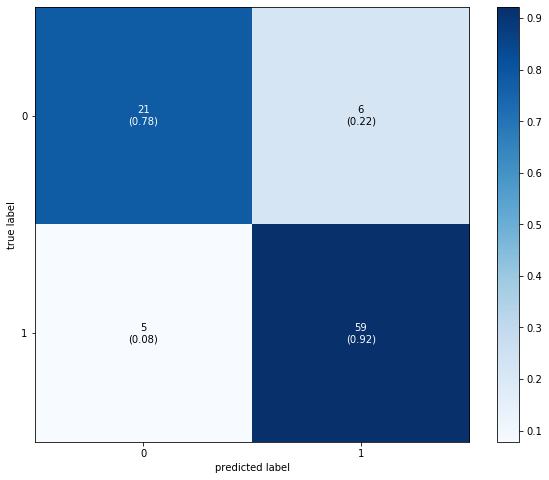

In [43]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm_svm = confusion_matrix(y_target=y_test, 
                          y_predicted=svm_predict, 
                          binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm_svm,figsize=(10,8),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap=plt.cm.Blues)

plt.savefig('SVM-Base-CM.jpg')
plt.show()

In [44]:
print("Misclassified samples: %d out of %d\n".center(67) % ((y_test != svm_predict).sum(), y_test.shape[0]))
print(classification_report(y_test, svm_predict))

                Misclassified samples: 11 out of 91
               
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.91      0.92      0.91        64

    accuracy                           0.88        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.88      0.88      0.88        91



##### SVM - GridSearchCV for Hyperparmeters Tuning

In [45]:
svm_cv = SVC()

param_grid = {'kernel': ["rbf", "sigmoid"],
              'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10, 100]
             } 

svmgrid = GridSearchCV(estimator = svm_cv,
                      param_grid = param_grid, 
                      cv = 5, 
                      scoring='accuracy', 
                      refit = True)   #setting grid with estimator

svmgrid.fit(x, y)
print("\nBest SVM parameters for this data set: ")
print(svmgrid.best_params_)


Best SVM parameters for this data set: 
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


###### 5 K-fold Cross Validation using Optimal Hyperparameters

In [46]:
sc = StandardScaler()
x = sc.fit_transform(x)
x = sc.transform(x)

svmop = SVC(kernel = 'rbf', 
            C = 1, 
            gamma = 0.01
           )

svmop_y_pred = cross_val_predict(svmop, x, y, cv=5)
print("Misclassified samples: %d out of %d\n".center(67) % ((y != svmop_y_pred).sum(), svmop_y_pred.shape[0]))
print(classification_report(y, svmop_y_pred))

                Misclassified samples: 55 out of 303
               
              precision    recall  f1-score   support

           0       0.75      0.55      0.64        87
           1       0.84      0.93      0.88       216

    accuracy                           0.82       303
   macro avg       0.79      0.74      0.76       303
weighted avg       0.81      0.82      0.81       303



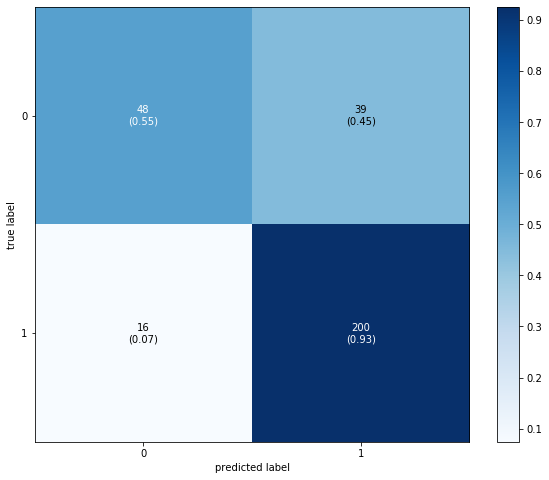

In [47]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm_svm_cv = confusion_matrix(y_target=y, 
                              y_predicted=svmop_y_pred, 
                              binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm_svm_cv,figsize=(10,8),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap=plt.cm.Blues)

plt.savefig('SVM-5KFCV-CM.jpg')
plt.show()

# <font color=red>Clustering<font>

In [48]:
alizadeh = pd.read_csv("ali_clean_transform.csv")
alizadeh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 54 columns):
Age                      303 non-null int64
Male                     303 non-null int64
BMI                      303 non-null float64
DM                       303 non-null int64
HTN                      303 non-null int64
Current Smoker           303 non-null int64
EX-Smoker                303 non-null int64
FH                       303 non-null int64
Obesity                  303 non-null int64
CRF                      303 non-null int64
CVA                      303 non-null int64
Airway disease           303 non-null int64
Thyroid Disease          303 non-null int64
CHF                      303 non-null int64
DLP                      303 non-null int64
BP                       303 non-null int64
PR                       303 non-null int64
Edema                    303 non-null int64
Weak Peripheral Pulse    303 non-null int64
Lung rales               303 non-null int64
Systolic Murm

In [49]:
print(alizadeh.shape)

(303, 54)


In [50]:
# set X, y
X = alizadeh.iloc[:,:-1]
y = alizadeh.iloc[:,-1]

In [51]:
# selected features from univariate feature selection, F-test p-values < 0.25.
sel = ['Age', 'Male', 'BMI', 'DM', 'HTN', 'Current Smoker', 'CRF',
       'Airway disease', 'BP', 'PR', 'Weak Peripheral Pulse',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Q Wave', 'St Elevation', 'St Depression',
       'Tinversion', 'Poor R Progression', 'FBS_log', 'CR', 'TG_log',
       'BUN_log', 'ESR_log', 'K', 'Na', 'Lymph', 'Neut', 'PLT_log',
       'EF_TTE_pow3', 'Region RWMA', 'LBBB']

##### Rescale Data

In [52]:
X_sel = X[sel]
sc = StandardScaler()
X_scaled = sc.fit_transform(X_sel)
print("Scale all features with mean = 0, SD = 1 \n")
print(pd.DataFrame(X_scaled).describe().round(2).T)

Scale all features with mean = 0, SD = 1 

    count  mean  std   min   25%   50%   75%   max
0   303.0   0.0  1.0 -2.79 -0.76 -0.09  0.68  2.61
1   303.0   0.0  1.0 -1.18 -1.18  0.85  0.85  0.85
2   303.0  -0.0  1.0 -2.23 -0.67 -0.12  0.53  3.34
3   303.0   0.0  1.0 -0.65 -0.65 -0.65  1.54  1.54
4   303.0   0.0  1.0 -1.20 -1.20  0.83  0.83  0.83
5   303.0   0.0  1.0 -0.51 -0.51 -0.51 -0.51  1.95
6   303.0   0.0  1.0 -0.14 -0.14 -0.14 -0.14  7.04
7   303.0   0.0  1.0 -0.19 -0.19 -0.19 -0.19  5.15
8   303.0  -0.0  1.0 -2.09 -0.51  0.02  0.55  3.20
9   303.0  -0.0  1.0 -2.83 -0.58 -0.58  0.55  3.92
10  303.0  -0.0  1.0 -0.13 -0.13 -0.13 -0.13  7.72
11  303.0   0.0  1.0 -0.17 -0.17 -0.17 -0.17  5.72
12  303.0  -0.0  1.0 -1.09 -1.09  0.92  0.92  0.92
13  303.0   0.0  1.0 -0.89 -0.89 -0.89  1.12  1.12
14  303.0  -0.0  1.0 -0.64 -0.64 -0.64  1.30  2.27
15  303.0   0.0  1.0 -0.67 -0.67 -0.67  1.50  1.50
16  303.0   0.0  1.0 -0.24 -0.24 -0.24 -0.24  4.24
17  303.0   0.0  1.0 -0.24 -0.24 -0.24 

##### K-means Clustering

Try out k-means clustering on the basic test-train split, with setting: **k = 2, cad/no-cad**.

We are unable to show the clustering in scatter plot due to the hyperdimensional nature of the clustering.

In [53]:
# split X, y into train test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

# setup
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, random_state=123)

# clustering
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

##### Accuracy and Classification Report 

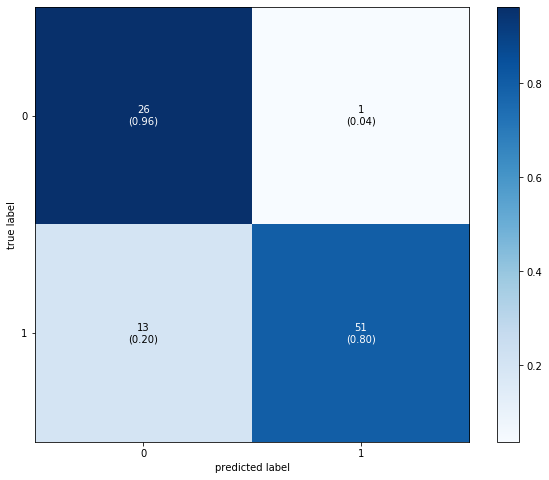


Misclassified = 14 out of 91 observations.

               precision    recall  f1-score   support

           0       0.67      0.96      0.79        27
           1       0.98      0.80      0.88        64

    accuracy                           0.85        91
   macro avg       0.82      0.88      0.83        91
weighted avg       0.89      0.85      0.85        91



In [54]:
k_labels_pred = kmeans.predict(X_test)
k_labels_pred = k_labels_pred  # to reverse the label

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm_kmeans = confusion_matrix(y_target=y_test, 
                                y_predicted=k_labels_pred, 
                                binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm_kmeans,figsize=(10,8),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap=plt.cm.Blues)

plt.savefig('k-means-CM.jpg')
plt.show()

# misclassified number
print("\nMisclassified =", len(y_test) - np.trace(cm_kmeans), "out of", len(y_test), "observations.")

# classification report
rep_kmeans = classification_report(y_test, k_labels_pred)
print("\n", rep_kmeans)

##### K-means clustering with 5-fold cross-validation

Use k-fold, given small data set, we want to obtain accurate estimate of test accuracy.

Setting: **k = 2, cad/no-cad**

Must use CV iterators, if we use cross_val_score helper function, some fold results will be inaccurate because of incorrect cluster order.

In [55]:
# setup
kf = KFold(n_splits=5)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, random_state=123)

# main clustering loop over k-folds
k_labels, k_test, len_test, cm_mat, k_acc = [], [], [], [], []
for train, test in kf.split(X_scaled):
  kmeans.fit(X_scaled[train])
  k_labels.append(kmeans.predict(X_scaled[test]))
  k_test.append(test)
  len_test.append(len(test))
  cm_mat.append(confusion_matrix(y[test], kmeans.predict(X_scaled[test])))
  k_acc.append(confusion_matrix(y[test], kmeans.predict(X_scaled[test])).trace()/len(test))
    
# swith label 0->1, 1->0 for mismatched cluster order
for fold in range(len(k_acc)):
  if k_acc[fold] < 0.5:
    k_labels[fold] = 1 - k_labels[fold]
    cm_mat[fold] = confusion_matrix(y[k_test[fold]], k_labels[fold])
    k_acc[fold] = cm_mat[fold].trace() / len_test[fold]

##### Accuracy Report

In [56]:
print(pd.DataFrame({"Fold no": list(range(1,(len(k_acc)+1))), "Accuracy": k_acc}), "\n")
print("%i-fold accuracy: %.3f, Min: %.3f, Max: %.3f" % (len(k_acc), np.mean(k_acc), np.min(k_acc), np.max(k_acc)))

   Fold no  Accuracy
0        1  0.754098
1        2  0.819672
2        3  0.852459
3        4  0.716667
4        5  0.616667 

5-fold accuracy: 0.752, Min: 0.617, Max: 0.852


##### Classification Report: Precision, Recall, F1-Score

In [57]:
# save precision, recall, f1-score metrics
prfs = []
for fold in range(len(k_acc)):
  prfs.append(precision_recall_fscore_support(y[k_test[fold]], k_labels[fold]))

pres_0_1 = pd.DataFrame(prfs).iloc[:,0].mean()
recall_0_1 = pd.DataFrame(prfs).iloc[:,1].mean()
f1_0_1 = pd.DataFrame(prfs).iloc[:,2].mean()

# print them
print("Precision, recall, f1-score details and summary: \n")
print("%i-fold metrics on CAD: Precision = %.3f, Recall = %.3f, f1-score = %.3f" % (len(k_acc), pres_0_1[1], recall_0_1[1], f1_0_1[1]))
print("%i-fold metrics on no CAD: Precision = %.3f, Recall = %.3f, f1-score = %.3f" % (len(k_acc), pres_0_1[0], recall_0_1[0], f1_0_1[0]))

# details
for fold in range(len(k_acc)):
  print("\nFold %i:" % (fold+1))
  print(classification_report(y[k_test[fold]], k_labels[fold]))

Precision, recall, f1-score details and summary: 

5-fold metrics on CAD: Precision = 0.931, Recall = 0.660, f1-score = 0.766
5-fold metrics on no CAD: Precision = 0.534, Recall = 0.931, f1-score = 0.676

Fold 1:
              precision    recall  f1-score   support

           0       0.44      1.00      0.62        12
           1       1.00      0.69      0.82        49

    accuracy                           0.75        61
   macro avg       0.72      0.85      0.72        61
weighted avg       0.89      0.75      0.78        61


Fold 2:
              precision    recall  f1-score   support

           0       0.47      0.90      0.62        10
           1       0.98      0.80      0.88        51

    accuracy                           0.82        61
   macro avg       0.72      0.85      0.75        61
weighted avg       0.89      0.82      0.84        61


Fold 3:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        15
      